In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as curce_fit
import pandas as pd

def degtorad(deg):
    return(deg/180*np.pi)


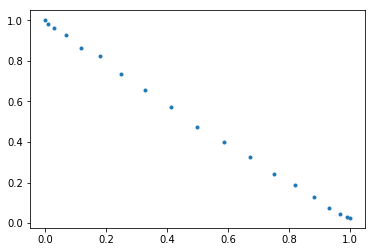

In [3]:
#Als erstes mal die Linearität der Fotodiode Prüfen
data=pd.read_table("Data/Polarisation.txt",skiprows=2)
data

angle=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
intens=intens/np.max(intens)
fig,ax=plt.subplots()
ax.plot(np.sin(degtorad(angle))**2,intens,".")

In [4]:
def dirac(wavelen,T,E_F):
    E=c.h * c.c / wavelen /c.e
    return 500/ ( np.exp((E-E_F)/8.6e-5 /T) -1 ) # k_B in eV
def diracE(E,T,E_F):
    return 1/ ( np.exp((E-E_F)/c.k/T) -1 ) 

def heavi(x,A,b,c):
    return A * (np.sign(x-b) + c) # A=amp/2 , b=Eg in nm

def expon(x,A,E_g):
    E=c.h * c.c / x /c.e
    return A * np.exp(E/E_g)
def linearfit(linf,x,y,m,b,ymin,ymax):
    """Returns popt,pcov,relevantx,relevanty"""
    tempx=[]
    tempy=[]
    #hier werden die Daten ausgewählt die im richtigen y interval sind
    for i in range(len(y)):
        if(ymin<y[i] and y[i]<ymax):
            tempx.append(x[i])
            tempy.append(y[i])
    popt,pcov=curce_fit(linf,tempx,tempy,p0=(m,b),maxfev=10000)
    return popt,pcov,tempx,tempy
def adjustLambda(lamb,m=0.98,b=23.25):
    return(b+lamb*m)
def wavelen_in_Energy(wavelen):
    wavelen=np.array(wavelen)
    wavelen=wavelen*1e-9
    E=c.h*c.speed_of_light/(wavelen*c.e)
    return(E)

No handles with labels found to put in legend.


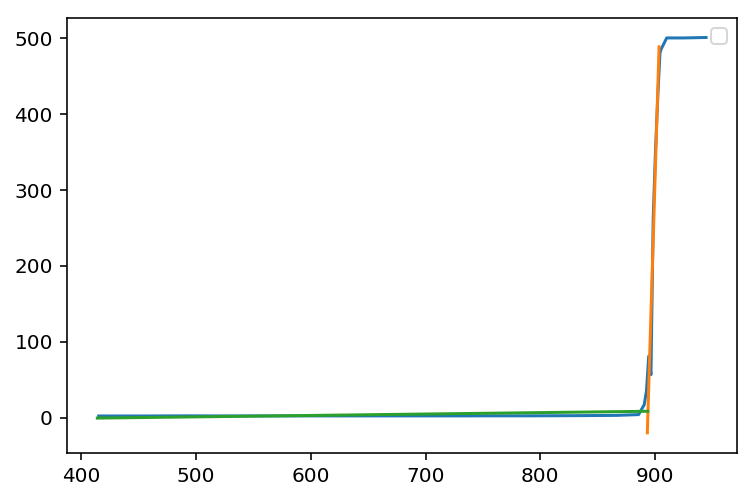

In [5]:

data=[]
data.append( pd.read_csv("Data/{}.txt".format("Links"),delimiter="\t",skiprows=1 ))
wavelen, intens =[],[]
for entry in data:
    wavelen= entry.values[:,0]
    intens = entry.values[:,1]
    

wavelen=np.array(wavelen)

#Als erstes nur die interessanten werte betrachten, also ab 950nm cutten
relwavelen=[]
for x in wavelen:
    if(x<950):
        relwavelen.append(x)
relintens=intens[0:len(relwavelen)]
relwavelen=adjustLambda(np.array(relwavelen))
fig, ax = plt.subplots(dpi=144)

#Data plot
ax.plot(relwavelen,relintens)

#Fit Steigung
linf=lambda x,m,b:m*x+b
popt,pcov,tempx,tempy=linearfit(linf,relwavelen,relintens,10,40,40,450)
extension=1.2
mylin=np.linspace(min(tempx)-extension,max(tempx)+extension)
ax.plot(mylin, linf(mylin,*popt))

#Fit Gerade
#Fit
linf=lambda x,m,b:m*x+b
popt,pcov,tempx,tempy=linearfit(linf,relwavelen,relintens,10,40,0,40)
extension=1.2
mylin=np.linspace(min(tempx)-extension,max(tempx)+extension)
ax.plot(mylin, linf(mylin,*popt))
ax.legend();


In [6]:
def plotXY(ax,filename,skiprows,label):
    data=pd.read_table(filename,skiprows=skiprows)
    angle=np.array(data.values[:,0])
    intens=np.array(data.values[:,1])
 
    ax.plot(angle,intens,label=label)

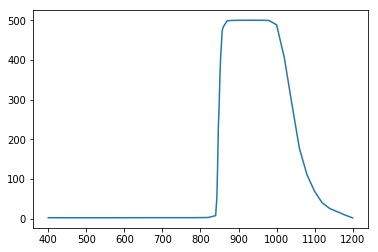

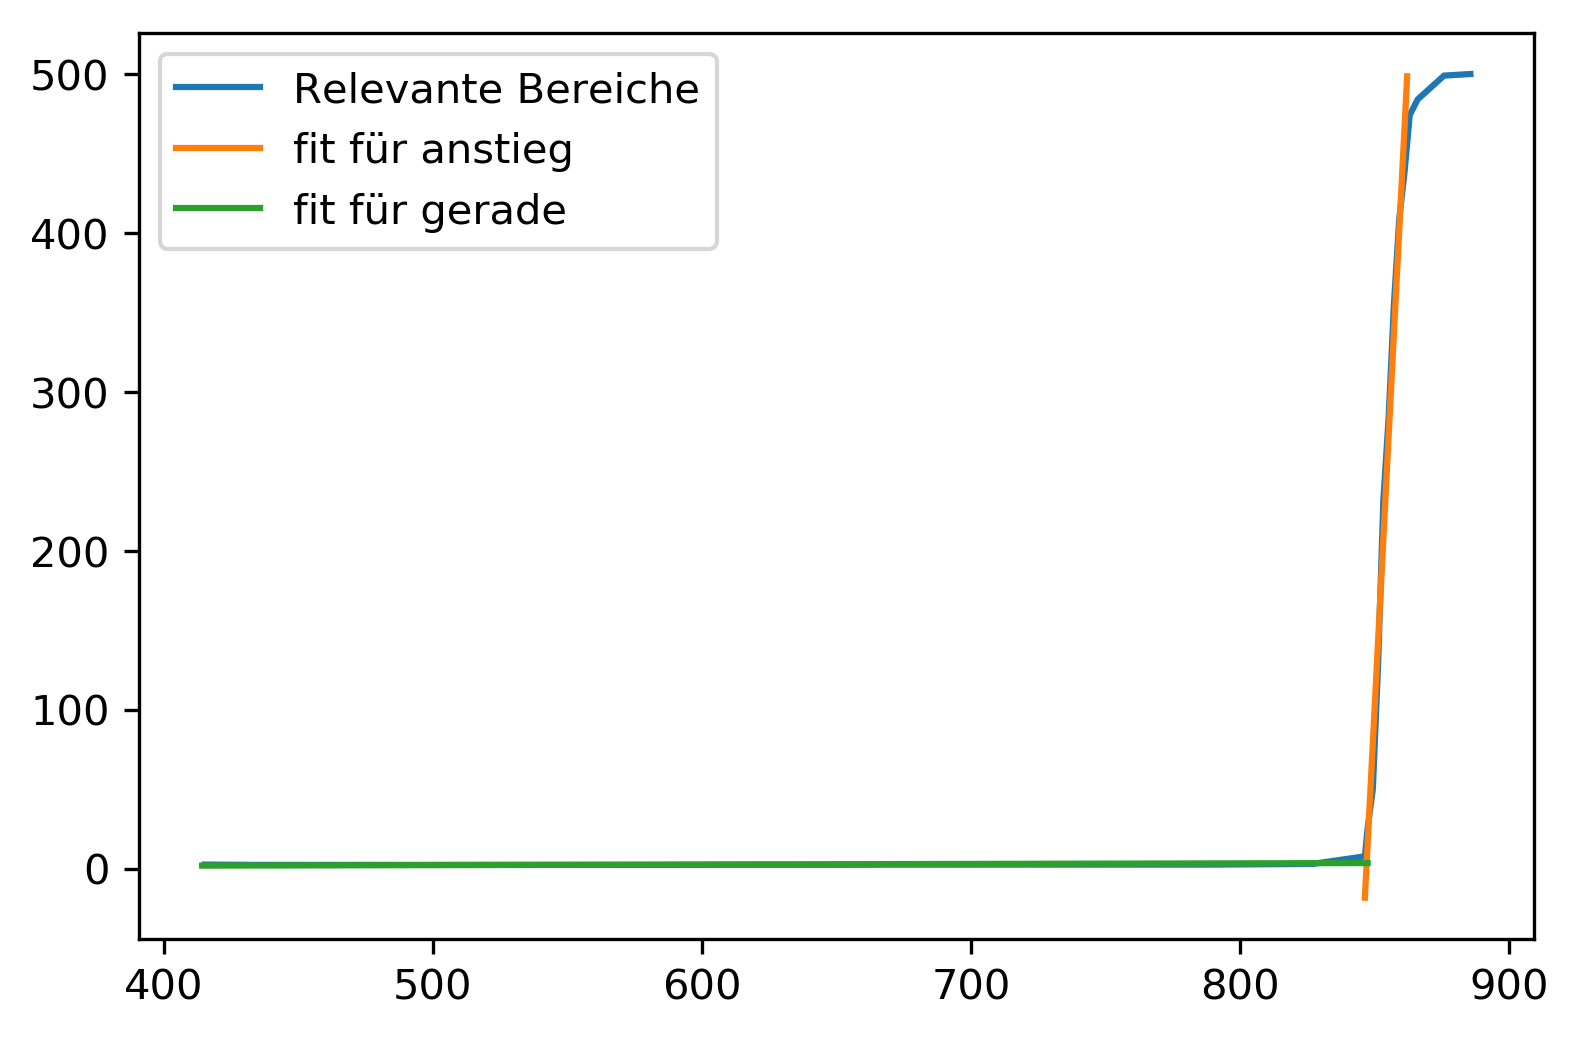

In [7]:
fig,ax=plt.subplots()
plotXY(ax,"Data/LinksN2.txt",2,"Gesamte Links N2")
data=pd.read_table("Data/LinksN2.txt",skiprows=2)
angle=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
#Den hinteren teil abschneiden
fig,ax=plt.subplots(dpi=300)
relangle=[]
for x in angle:
    if(x<900):
        relangle.append(x)
relangle=adjustLambda(np.array(relangle))
relintens=intens[:len(relangle)]
ax.plot(relangle,relintens,label="Relevante Bereiche")
#Fit des Anstiegs
func=lambda x,m,b:m*x+b
popt,pcov,xplot,yplot=linearfit(func,relangle,relintens,10,800,20,450)
mylin=np.linspace(min(xplot)-1,max(xplot)+1,1000)
ax.plot(mylin,func(mylin,*popt),label="fit für anstieg")
#Fit der geraden bis 800nm
popt,pcov,xplot,yplot=linearfit(func,relangle,relintens,0,0,0,20)
mylin=np.linspace(min(xplot)-1,max(xplot)+1,1000)
ax.plot(mylin,func(mylin,*popt),label="fit für gerade")
ax.legend()

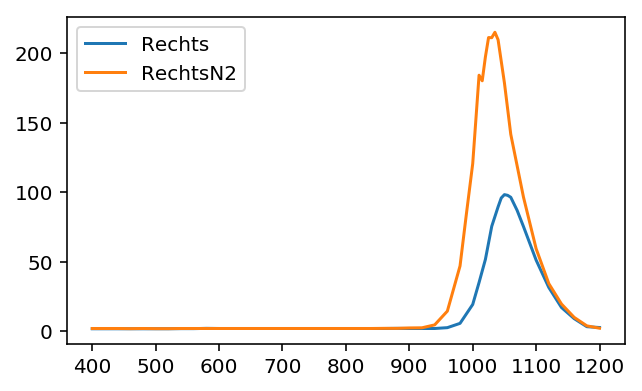

In [8]:
fig,ax=plt.subplots(dpi=144,figsize=(5,3))
plotXY(ax,"Data/Rechts.txt",2,"Rechts")
plotXY(ax,"Data/RechtsN2.txt",2,"RechtsN2")
#plotXY(ax,"Data/Links.txt",2,"Links")
#plotXY(ax,"Data/LinksN2.txt",2,"LinksN2")
#ax.semilogy()
ax.legend()

In [41]:
def indFit(wl,Eg,Ep,A,T=300):
    wl=wl*1e-9
    h_nu= c.h*c.c /wl /c.e
    return A *((h_nu - Eg + Ep)**2/ ( np.exp(Ep/c.Boltzmann/c.e / T) -1) + (h_nu - Eg - Ep)**2/ ( 1- np.exp(-Ep/c.Boltzmann/c.e / T) ))

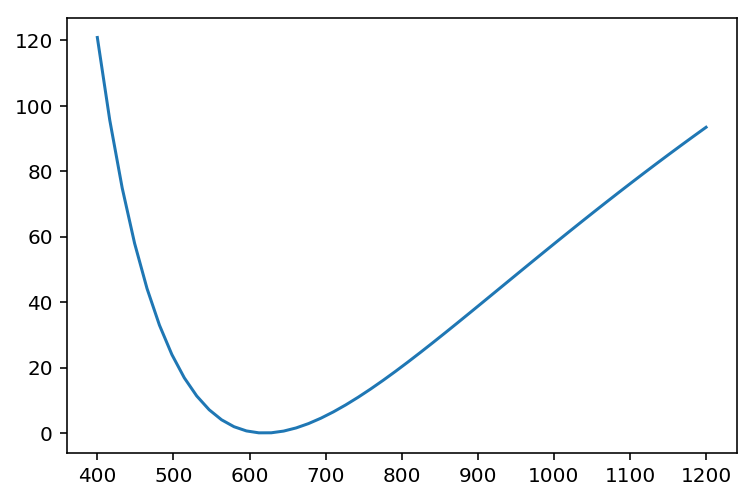

In [42]:
#popt,pcov=cf(ind Fit)

d=np.linspace(400,1200)
fig,ax=plt.subplots(dpi=144)
ax.plot(d,100* indFit(d, 1.7, 0.3,1))
#ax.set(yscale="log")

1 : [ 5.56519555e-13  5.56372182e-13 -7.00314514e-07]
2 : [ 4.27986219e-09  3.92238423e-09 -7.00314512e-07]
3 : [ 2.60268028e-10  6.27311903e-10 -7.00314513e-07]
4 : [ 1.67326277e-09  4.03681444e-09 -7.00314512e-07]
5 : [ 9.72837712e-12  1.43117394e-11 -7.00314514e-07]
6 : [ 1.31955062e-12  1.94147699e-12 -7.00314514e-07]
7 : [ 2.67923867e-10  3.27869346e-10 -7.00314513e-07]
8 : [ 1.37623982e-09  2.02485527e-09 -7.00314512e-07]
9 : [ 3.93366950e-13  6.40595038e-13 -7.00314514e-07]
10 : [ 1.04815122e-09  1.70703216e-09 -7.00314510e-07]
11 : [ 1.02619213e+03  3.75239768e+01 -3.96172285e-04]
12 : [ 3.92092858e-09  4.27798015e-09 -7.00314512e-07]
13 : [ 2.38480126e-12  3.17756424e-12 -7.00314514e-07]
14 : [ 1.20574498e-09  1.67235419e-09 -7.00314513e-07]
15 : [ 5.16400045e-10  4.72927628e-10 -7.00314513e-07]
16 : [ 1.50883714e-11  1.97295415e-11 -7.00314514e-07]
17 : [ 4.83980165e+02  5.79735962e+02 -3.96172107e-04]
18 : [ 1.46631430e-10  1.99338848e-10 -7.00314513e-07]
19 : [ 6.54596006e+

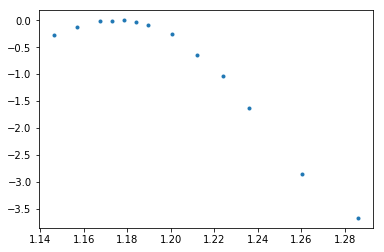

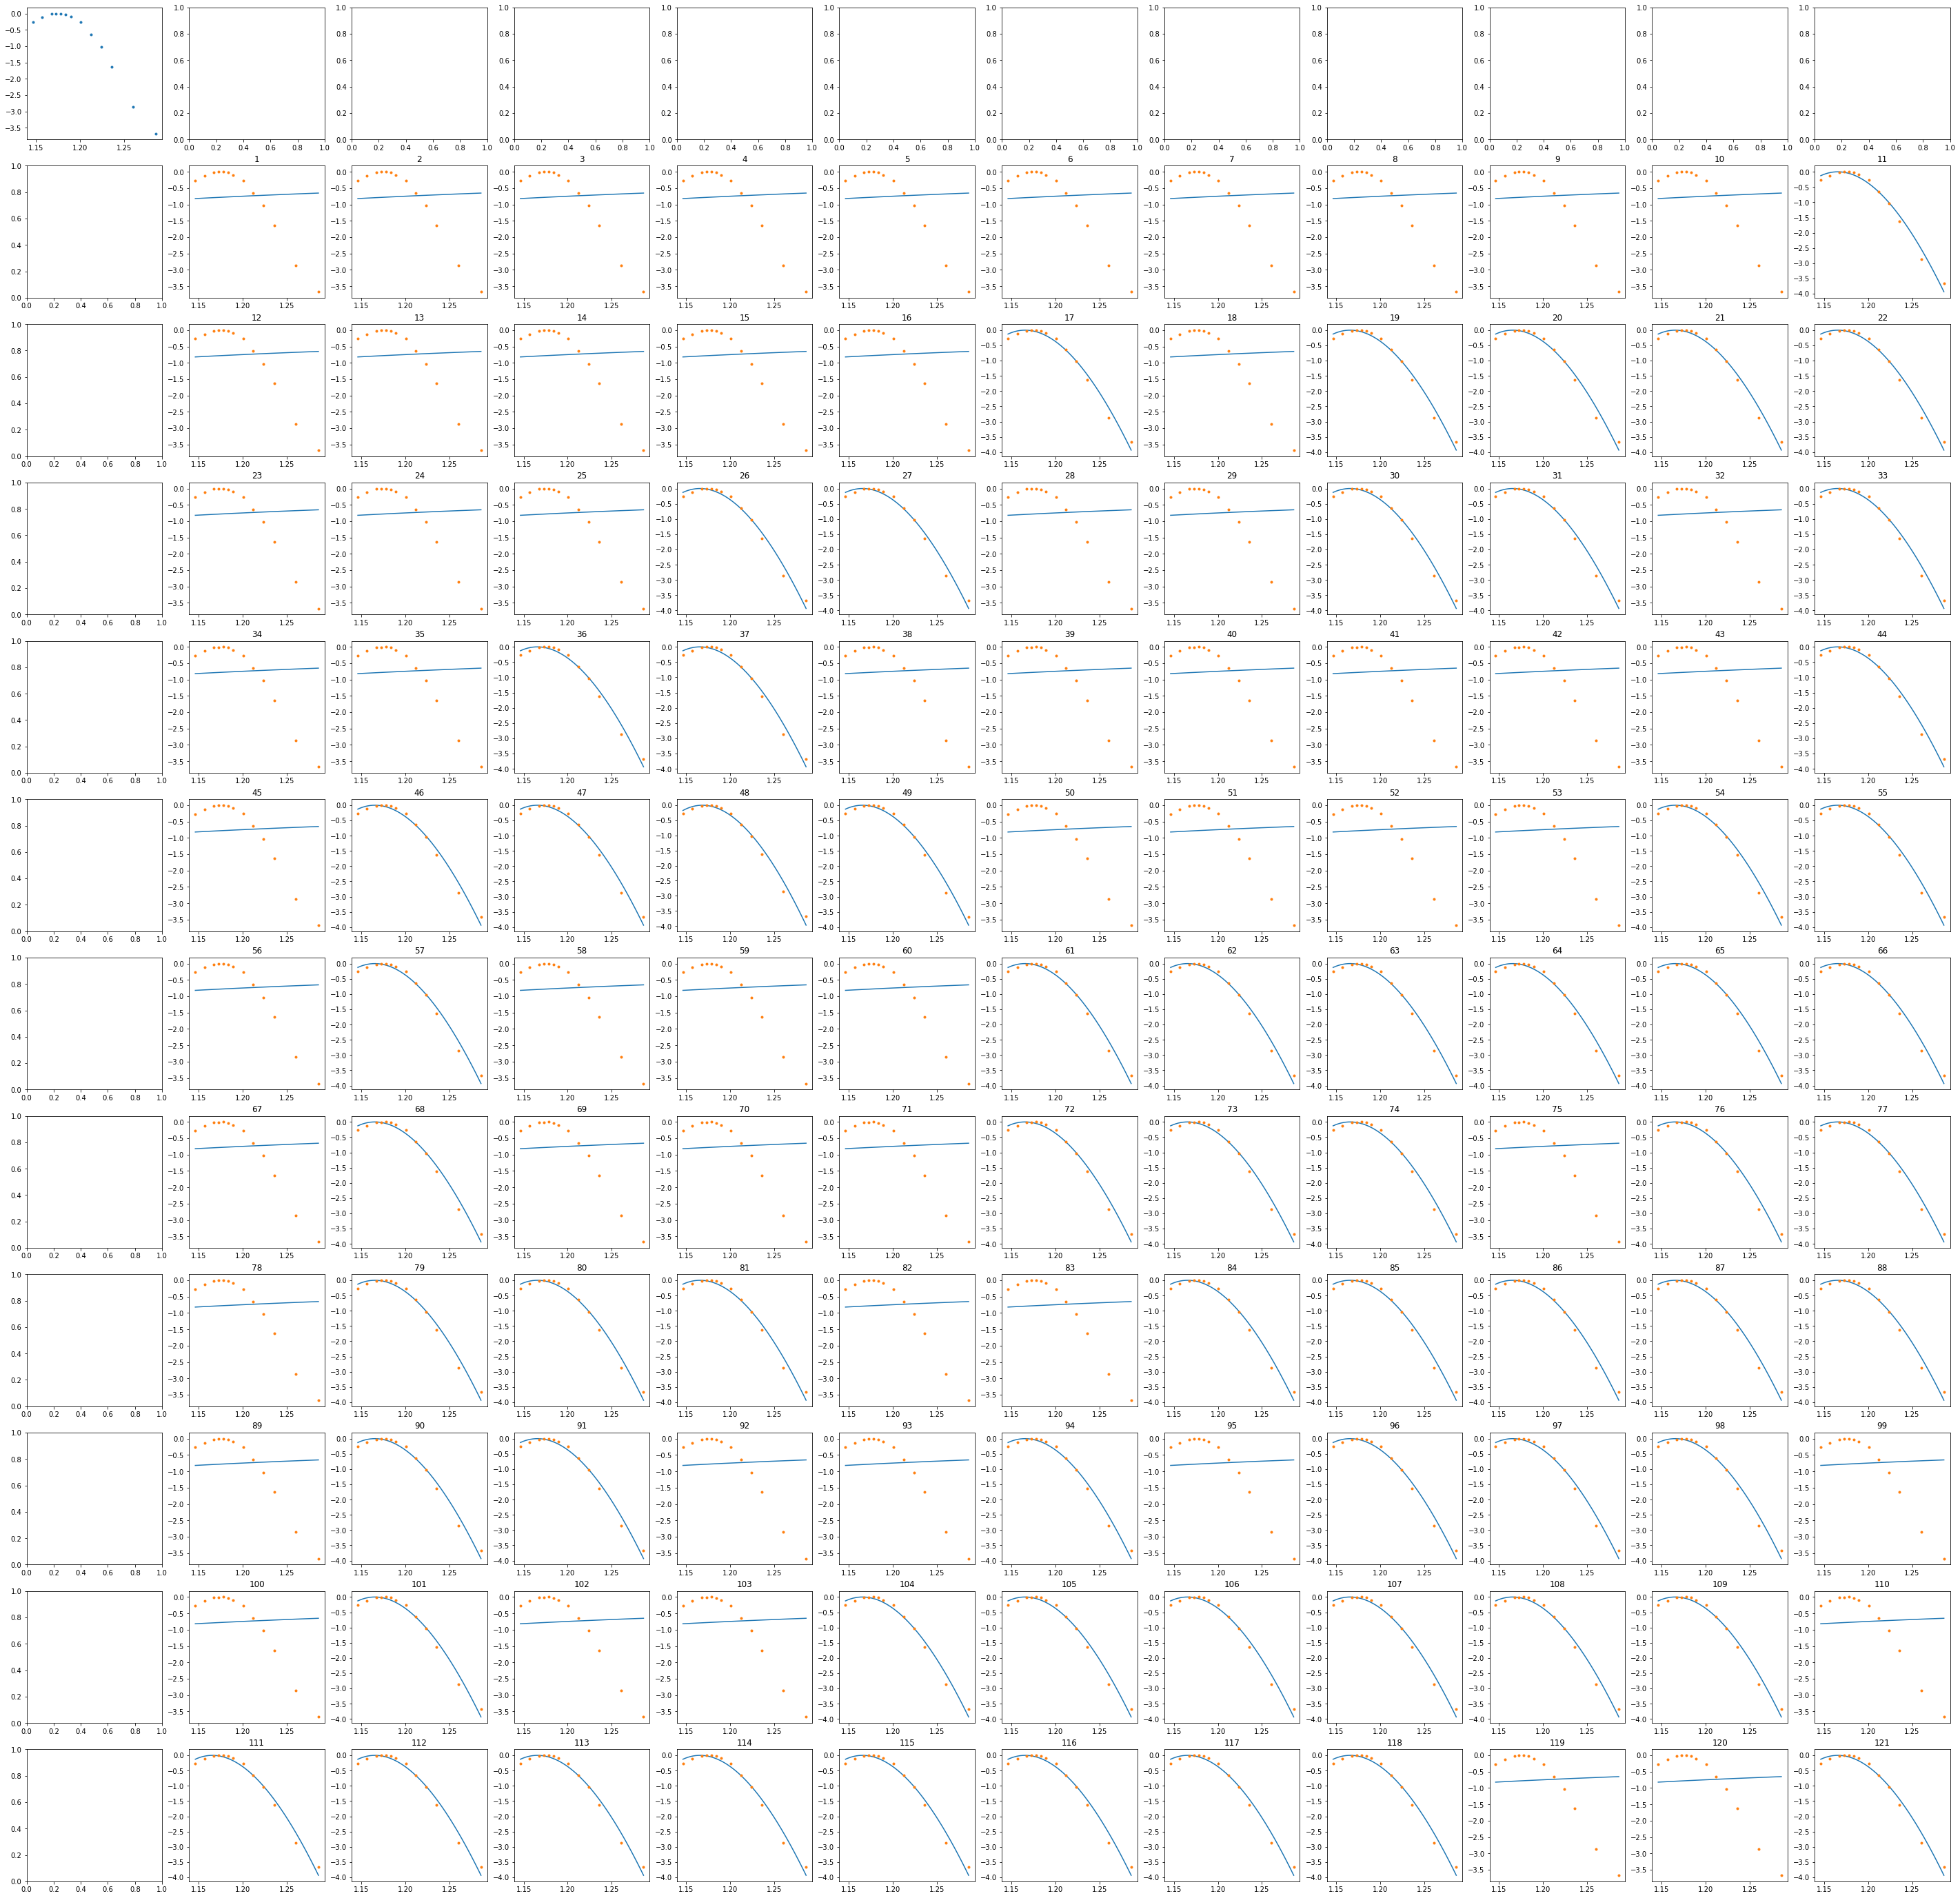

In [52]:
data=pd.read_table("Data/Rechts.txt",skiprows=2)
wavelen=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
wavelen=adjustLambda(wavelen)
temp=np.argmax(intens)+5
xmin=28
intens=intens[xmin:temp]
intens=intens/np.max(intens)

#hier bin ich mir nicht sicher
intens=np.log(intens)

wavelen=wavelen[xmin:temp]
energy=wavelen_in_Energy(wavelen)
fig,ax=plt.subplots()
ax.plot(energy,intens,".")
fig,ax=plt.subplots(nrows=12,ncols=12,figsize=(50,50))
ax[0,0].plot(energy,intens,".")
Eg=np.linspace(1e-2,1e2,11)
Ef=Eg
counter=0
xcounter=0
ycounter=0
xaxis=np.linspace(min(energy),max(energy))
for x in Eg:
    xcounter=xcounter+1
    ycounter=0
    for y in Ef:
        try:
            counter=counter+1
            popt,pcov=curce_fit(indFit,energy,intens,p0=(x,y,1),maxfev=10000,bounds=([0,0,-np.inf],[np.inf,np.inf,np.inf]) )
            #if(popt[0]>popt[1]):
            print(counter,":",popt)
            ycounter=ycounter+1
            ax[xcounter,ycounter].plot(xaxis,indFit(xaxis,*popt))
            ax[xcounter,ycounter].plot(energy,intens,".")
            ax[xcounter,ycounter].set_title(counter)
        except RuntimeError:
            print("nothing")

In [50]:
def indFit(wl,Eg,Ep,A,T=77):
    wl=wl*1e-9
    h_nu= c.h*c.c /wl /c.e
    return A *((h_nu - Eg + Ep)**2/ ( np.exp(Ep/c.Boltzmann/c.e / T) -1) + (h_nu - Eg - Ep)**2/ ( 1- np.exp(-Ep/c.Boltzmann/c.e / T) ))

1 : [4.66177178e+02 4.65575828e+02 1.09418013e-04]
2 : [4.74622487e+02 4.57130537e+02 1.09418057e-04]
3 : [4.74790380e+02 4.56962651e+02 1.09418078e-04]
4 : [4.23034453e+02 5.08718614e+02 1.09418165e-04]
5 : [4.23473982e+02 5.08279036e+02 1.09418045e-04]
6 : [4.42044816e+02 4.89708240e+02 1.09418137e-04]
7 : [4.23280472e+02 5.08472505e+02 1.09417942e-04]
8 : [4.02941846e+02 5.28811172e+02 1.09418045e-04]
9 : [4.34594126e+02 4.97158906e+02 1.09418078e-04]
10 : [4.04558269e+02 5.27194740e+02 1.09418019e-04]
11 : [4.57069242e+02 4.74683782e+02 1.09418057e-04]
12 : [4.90209888e+02 4.41543190e+02 1.09418194e-04]
13 : [4.74923062e+02 4.56829925e+02 1.09417968e-04]
14 : [4.36588501e+02 4.95164563e+02 1.09418157e-04]
15 : [4.85319373e+02 4.46433670e+02 1.09418107e-04]
16 : [4.89161120e+02 4.42591951e+02 1.09418175e-04]
17 : [4.55554994e+02 4.76197993e+02 1.09417966e-04]
18 : [4.28090013e+02 5.03663071e+02 1.09418208e-04]
19 : [8.93586584e+02 3.81665064e+01 1.09418225e-04]
20 : [4.04712345e+02 

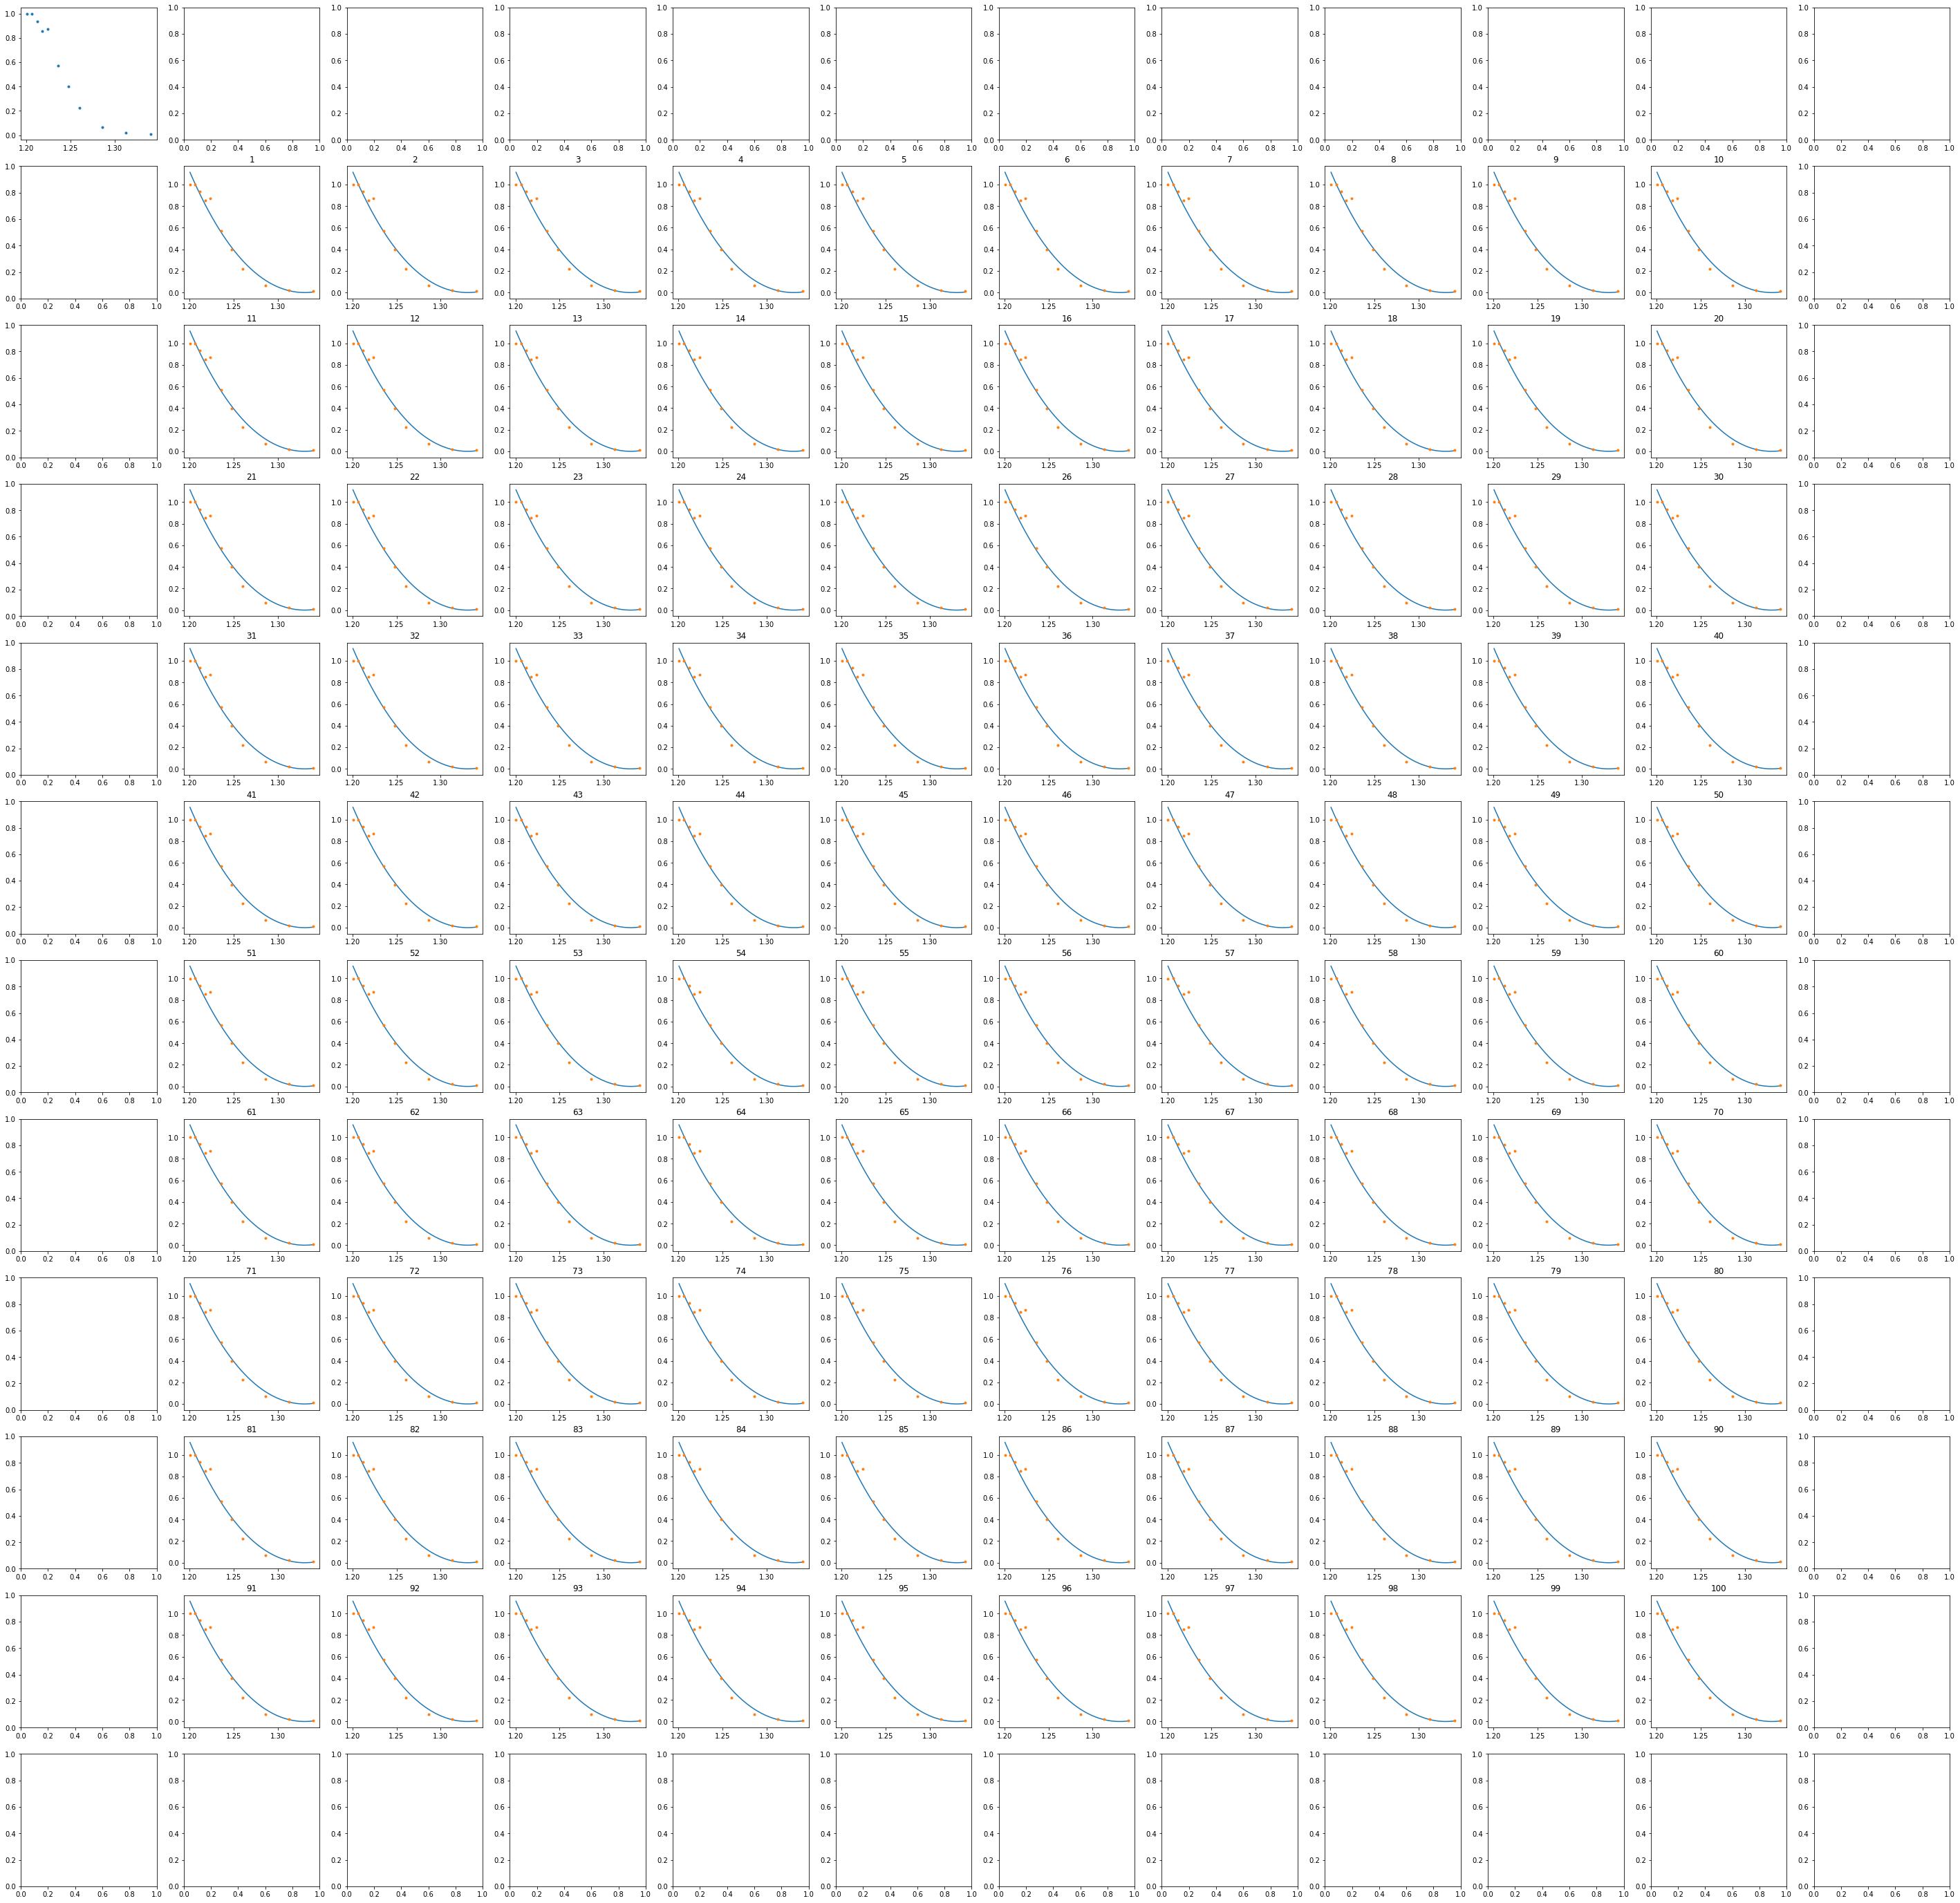

In [51]:
data=pd.read_table("Data/RechtsN2.txt",skiprows=2)
wavelen=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
wavelen=adjustLambda(wavelen)
temp=np.argmax(intens)
xmin=26
intens=intens[xmin:temp]
intens=intens/np.max(intens)
#intens=np.log(intens)
wavelen=wavelen[xmin:temp]
energy=wavelen_in_Energy(wavelen)
fig,ax=plt.subplots(nrows=12,ncols=12,figsize=(50,50))
ax[0,0].plot(energy,intens,".")
Eg=np.linspace(1e-2,1e2,10)
Ef=Eg
counter=0
xcounter=0
ycounter=0
xaxis=np.linspace(min(energy),max(energy))
for x in Eg:
    xcounter=xcounter+1
    ycounter=0
    for y in Ef:
        try:
            
            popt,pcov=curce_fit(indFit,energy,intens,p0=(x,y,1),maxfev=10000,bounds=([0,0,-np.inf],[np.inf,np.inf,np.inf]))
            counter=counter+1
            print(counter,":",popt)
            ycounter=ycounter+1
            ax[xcounter,ycounter].plot(xaxis,indFit(xaxis,*popt))
            ax[xcounter,ycounter].plot(energy,intens,".")
            ax[xcounter,ycounter].set_title(counter)
        except RuntimeError:
            print("nothing")

In [49]:
c.Boltzmann/c.e

8.617330337217213e-05